# Постановка задачи

Вам поручили изучить характеристики процесса обработки стали. Для каждого значения столбца key найдите:

- Длительность времени между первым и последним замером температуры.
- Суммарное время нагрева электродами, то есть сумму значений по всем промежуткам между запусками нагрева электродов.
- Количество запусков нагрева электродами.
- Среднее соотношение потребления активной и реактивной мощности.
- По всем полученным столбцам вычислите статистики: средние, минимальные и максимальные значения, медиану и величины 25%- и 75%-квартилей.

# Импорт библиотек

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

import warnings
warnings.filterwarnings('ignore')

# Импорт данных

In [2]:
# Data import.
try:
    data_arc = pd.read_csv('datasets/data_arc.csv')
    #data_bulk = pd.read_csv('/datasets/final_steel/data_bulk.csv')
    #data_bulk_time = pd.read_csv('/datasets/final_steel/data_bulk_time.csv')
    #data_gas = pd.read_csv('/datasets/final_steel/data_gas.csv')
    data_temp = pd.read_csv('datasets/data_temp.csv')
    #data_wire = pd.read_csv('/datasets/final_steel/data_wire.csv')
    #data_wire_time = pd.read_csv('/datasets/final_steel/data_wire_time.csv')
except:
    data_arc = pd.read_csv('/content/drive/My Drive/Colab Notebooks/graduation_project/data_arc.csv')
    #data_bulk = pd.read_csv('/content/drive/My Drive/Colab Notebooks/graduation_project/data_bulk.csv')
    #data_bulk_time = pd.read_csv('/content/drive/My Drive/Colab Notebooks/graduation_project/data_bulk_time.csv')
    #data_gas = pd.read_csv('/content/drive/My Drive/Colab Notebooks/graduation_project/data_gas.csv')
    data_temp = pd.read_csv('/content/drive/My Drive/Colab Notebooks/graduation_project/data_temp.csv')
    #data_wire = pd.read_csv('/content/drive/My Drive/Colab Notebooks/graduation_project/data_wire.csv')
    #data_wire_time = pd.read_csv('/content/drive/My Drive/Colab Notebooks/graduation_project/data_wire_time.csv')

In [3]:
data_arc.head()

,key,Начало нагрева дугой,Конец нагрева дугой,Активная мощность,Реактивная мощность
0,1,2019-05-03 11:02:14,2019-05-03 11:06:02,0.976059,0.687084
1,1,2019-05-03 11:07:28,2019-05-03 11:10:33,0.805607,0.520285
2,1,2019-05-03 11:11:44,2019-05-03 11:14:36,0.744363,0.498805
3,1,2019-05-03 11:18:14,2019-05-03 11:24:19,1.659363,1.062669
4,1,2019-05-03 11:26:09,2019-05-03 11:28:37,0.692755,0.414397


In [4]:
data_temp.head()

,key,Время замера,Температура
0,1,2019-05-03 11:16:18,1571.0
1,1,2019-05-03 11:25:53,1604.0
2,1,2019-05-03 11:29:11,1618.0
3,1,2019-05-03 11:30:01,1601.0
4,1,2019-05-03 11:30:39,1613.0


# Приведение типов

In [5]:
# Data_arc fix.
data_arc['Начало нагрева дугой'] = pd.to_datetime(data_arc['Начало нагрева дугой'], format='%Y-%m-%d %H:%M:%S')
data_arc['Конец нагрева дугой'] = pd.to_datetime(data_arc['Конец нагрева дугой'], format='%Y-%m-%d %H:%M:%S')

# Data_temp fix.
data_temp['Время замера'] = pd.to_datetime(data_temp['Время замера'], format='%Y-%m-%d %H:%M:%S')

# Отбор пригодных партий

In [6]:
def float_data_analyzer(data, columns, bins, round_lim):
    '''This function print and plot distribution of float-columns from inputing data.
        Input:
        data — the intrested data (DataFrame),
        columns — list of intrested columns from data,
        bins — number of bins for hist,
        round_lim — precision of describtion-rounding.
        
        Output:
        stat-describtion, boxplot and hist for each column.'''
        
    for column in columns:
        print(data[column].describe().round(round_lim))
        fig, ax = plt.subplots(1, 2, figsize=(12, 5))
        ax[0].set_title(f'Диаграмма размаха {column}')
        sns.boxplot(y=column, data=data, ax=ax[0], palette='Blues')
        sns.distplot(data[column], bins=bins, color='indigo', ax=ax[1])
        ax[1].set_title(f'Распределение {column}')
        plt.show()

count    14876.00
mean         0.67
std          0.41
min          0.03
25%          0.40
50%          0.56
75%          0.86
max          3.73
Name: active_power, dtype: float64


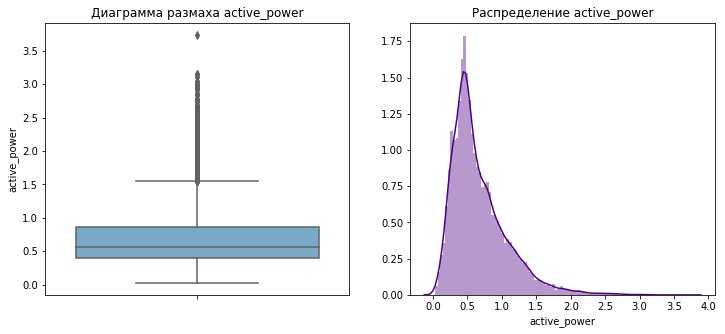

count    14876.00
mean         0.45
std          5.88
min       -715.50
25%          0.29
50%          0.42
75%          0.64
max          2.68
Name: reactive_power, dtype: float64


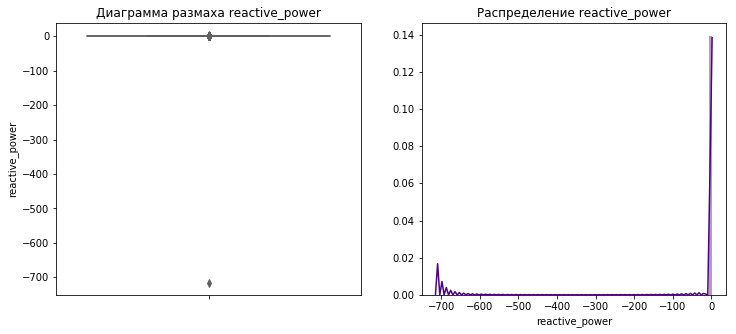

In [7]:
data_arc.columns = ['key', 'first_time', 'last_time', 'active_power', 'reactive_power']
float_data_analyzer(data_arc, ['active_power', 'reactive_power'], 100, 2)

In [8]:
data_arc[data_arc['reactive_power'] < -100]

,key,first_time,last_time,active_power,reactive_power
9780,2116,2019-07-24 00:44:48,2019-07-24 00:46:37,0.495782,-715.504924


In [9]:
# Temp-key stat.
temp_key_stat = pd.pivot_table(data_temp, index='key', values='Температура', aggfunc='count')
temp_key_stat.columns = ['measurment_counts']
temp_key_stat = temp_key_stat.sort_values(by='measurment_counts', ascending=True)
temp_key_stat

,measurment_counts
key,
3241,1
2809,1
2808,1
2807,1
2806,1
2805,1
2804,1
2803,1
2802,1


In [10]:
print('Количество партий с менее чем двумя измерениями температуры:', temp_key_stat[temp_key_stat['measurment_counts'] < 2].shape[0])

Количество партий с менее чем двумя измерениями температуры: 741


In [11]:
# Creating list with keys of 'wrong' parties.
drop_list = list(temp_key_stat[temp_key_stat['measurment_counts'] < 2].index)

# Append anomal-power party (known from EDA).
drop_list.append(2116)

In [12]:
# Data_temp cleaning.
data_temp.drop(data_temp[data_temp['key'].isin(drop_list)].index, inplace=True)

# Data_arc cleaning.
data_arc.drop(data_arc[data_arc['key'].isin(drop_list)].index, inplace=True)

# Расчёт времени обработки (время между первой и последней температурами)

In [13]:
# Time of first & last measurment.
data_common = pd.pivot_table(data_temp, index=['key'], values='Время замера', aggfunc=['min', 'max'])
data_common.columns = ['first_time', 'last_time']
data_common.head(1)

,first_time,last_time
key,,
1,2019-05-03 11:16:18,2019-05-03 11:30:39


In [14]:
def session_time_calculation(row):
    first_time = row['first_time']
    last_time = row['last_time']

    time = pd.Timedelta(last_time - first_time, unit='sec').total_seconds()
    return time

In [15]:
# Features compression.
data_common['session_time_sec'] = data_common.apply(session_time_calculation, axis=1)

In [16]:
data_common.drop(columns=['first_time', 'last_time'], inplace=True)
data_common.head()

,session_time_sec
key,
1,861.0
2,1305.0
3,1300.0
4,388.0
5,762.0


# Расчёт времени подогрева электродами

In [17]:
# Features compression.
data_arc['heating_time_sec'] = data_arc.apply(session_time_calculation, axis=1)

In [18]:
data_arc.head(1)

,key,first_time,last_time,active_power,reactive_power,heating_time_sec
0,1,2019-05-03 11:02:14,2019-05-03 11:06:02,0.976059,0.687084,228.0


In [19]:
# Arc statictics calculation.
arc_stats = pd.pivot_table(data_arc, index='key', values='heating_time_sec', aggfunc=['sum', 'count'])
arc_stats.columns = ['sum_heating_time_sec', 'heatings_amount ']
arc_stats.reset_index(level=0, inplace=True)
arc_stats.head()

,key,sum_heating_time_sec,heatings_amount
0,1,1098.0,5
1,2,811.0,4
2,3,655.0,5
3,4,741.0,4
4,5,869.0,4


# Расчёт отношения мощностей

In [20]:
def ratio_calculation(row):
    active_power = row['active_power']
    reactive_power = row['reactive_power']

    try:
        return active_power / reactive_power
    except:
        return np.nan

In [21]:
# Power-ratio calculation.
data_arc['a/r_power_ratio'] = data_arc.apply(ratio_calculation, axis=1)

In [22]:
data_arc.head(5)

,key,first_time,last_time,active_power,reactive_power,heating_time_sec,a/r_power_ratio
0,1,2019-05-03 11:02:14,2019-05-03 11:06:02,0.976059,0.687084,228.0,1.420582
1,1,2019-05-03 11:07:28,2019-05-03 11:10:33,0.805607,0.520285,185.0,1.548395
2,1,2019-05-03 11:11:44,2019-05-03 11:14:36,0.744363,0.498805,172.0,1.492292
3,1,2019-05-03 11:18:14,2019-05-03 11:24:19,1.659363,1.062669,365.0,1.561504
4,1,2019-05-03 11:26:09,2019-05-03 11:28:37,0.692755,0.414397,148.0,1.671717


In [23]:
# Mean ratio calculation.
power_stats = pd.pivot_table(data_arc, index='key', values='a/r_power_ratio', aggfunc='mean')
power_stats.reset_index(level=0, inplace=True)
power_stats

,key,a/r_power_ratio
0,1,1.538898
1,2,1.551834
2,3,1.583120
3,4,1.563487
4,5,1.480428
5,6,1.501854
6,7,1.628748
7,8,1.486391
8,9,1.421598
9,10,1.231654


# Объединение таблиц для итогового результата

In [24]:
# Combine new data.
data_common = data_common.merge(power_stats, on='key', how='left')
data_common = data_common.merge(arc_stats, on='key', how='left')

In [25]:
# Final data.
data_common.set_index(data_common['key'], inplace=True)
data_common.drop('key', axis=1, inplace=True)
data_common

,session_time_sec,a/r_power_ratio,sum_heating_time_sec,heatings_amount
key,,,,
1,861.0,1.538898,1098.0,5
2,1305.0,1.551834,811.0,4
3,1300.0,1.583120,655.0,5
4,388.0,1.563487,741.0,4
5,762.0,1.480428,869.0,4
6,1385.0,1.501854,952.0,4
7,1374.0,1.628748,673.0,4
8,934.0,1.486391,913.0,4
9,1453.0,1.421598,625.0,5


In [26]:
# Final stats.
data_stats = data_common.describe().round(2)
data_stats

,session_time_sec,a/r_power_ratio,sum_heating_time_sec,heatings_amount
count,2474.00,2474.00,2474.00,2474.00
mean,1855.21,1.36,800.10,4.63
std,1301.44,0.13,340.77,1.61
min,234.00,0.69,57.00,1.00
25%,1182.25,1.29,573.00,4.00
50%,1593.00,1.37,772.50,4.00
75%,2262.75,1.44,986.75,6.00
max,23537.00,1.78,4189.00,16.00
